# Handwriting Recognition

**Packages Requirements**: You will need to install the `imageio`. Do the follow to install the package:

- Open `Anaconda Prompt`
- Type in `pip install imageio`


## Import some packages

In [1]:
import imageio
from skimage.transform import resize
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import os

### Set the Label

What do you want to recognize? Change the `lab` variable to get the desired label. 

In [2]:
lab = ['1','2','3']

### Set the reduced resolution for images

This is the resolution of images used to train the model. If the dim = 75, it means each image will be convert to 32x32 pixel image. Since this is greyscale images, a 75x75 image means each row of the data will have 75*75 = 5625 columns. 

- Increase the resolution (set dim to a larger number) will increase trainingperformance (which could also lead to overfiting). 
- Increase the resolution also mean the computation time increases. 

In [3]:
dim = 5

# Import training in data

The two below code cells import all the pictures of the digits and include it to the `Xtrain` and `ytrain`

### Set the path to the folders that containing the images folder

This is the folder that contains three images folders and the test image (`test.png`)

In [4]:
#pat = 'C:\\Users\\SON\\Dropbox\\git\\Math460\\python\\digits'
#pat = 'C:\\Users\\snguyen4\\Dropbox\\git\\Math460\\python\\digits'
import os
pat=os.getcwd()

### Import first category image

In [5]:
path = pat + '\\1' 
names = [f for f in os.listdir(path)]

im = imageio.imread(path+'\\'+names[0])
im1 = resize(im, (dim, dim))
im1 = im1[:,:,0]
im1 = im1.reshape(-1).reshape(1, -1)
Xtrain = im1

for n in names[1:]:
    im = imageio.imread(path+'\\'+n)
    im1 = resize(im, (dim, dim))
    im1 = im1[:,:,0]
    im1 = im1.reshape(-1).reshape(1, -1)
    Xtrain = np.append(Xtrain, im1,0)

ytrain=np.repeat(lab[0],len(names))  

### Import second category image

In [6]:
path = pat + '\\2' 

import os
names = [f for f in os.listdir(path)]

for n in names:
    im = imageio.imread(path+'\\'+n)
    im1 = resize(im, (dim, dim))
    im1 = im1[:,:,0]
    im1 = im1.reshape(-1).reshape(1, -1)
    Xtrain = np.append(Xtrain, im1,0)

ytrain=np.append(ytrain, np.repeat(lab[1],len(names)))

### Import third category image

In [7]:
path = pat + '\\3' 
import os
names = [f for f in os.listdir(path)]

for n in names:
    im = imageio.imread(path+'\\'+n)
    im1 = resize(im, (dim, dim))
    im1 = im1[:,:,0]
    im1 = im1.reshape(-1).reshape(1, -1)
    Xtrain = np.append(Xtrain, im1,0)

ytrain=np.append(ytrain, np.repeat(lab[2],len(names)))

## Training a Random Forest with the loaded data

Notice `n_estimators` is the number of trees in the forest. 

In [8]:
model = RandomForestClassifier(n_estimators=100) # this random forest has 100 trees. 
model.fit(Xtrain, ytrain)

RandomForestClassifier()

## Training Accuracy

In [9]:
ypred_train=model.predict(Xtrain)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ypred_train, ytrain)
print('===============')
print('Confusion Matrix:')
print(mat)
print('===============')
print('Training Accuracy:')
print(mat.diagonal().sum()/mat.sum())
print('===============')

Confusion Matrix:
[[20  0  0]
 [ 0 30  0]
 [ 0  0 25]]
Training Accuracy:
1.0


## Testing the model on a new image

Create a test image named `test.png` and save it to the same folder. 

Input Image


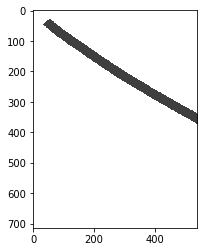

Reduced Input Image


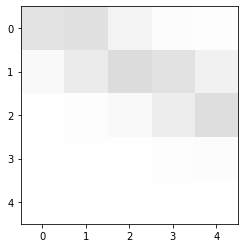


The model predicts: ['1']


In [11]:
im = imageio.imread(pat +'\\test.png')
print('Input Image')
plt.imshow(im)
plt.show()

from skimage.transform import resize
im1 = resize(im, (dim, dim))
print('Reduced Input Image')
plt.imshow(im1)
plt.show()


im1 = im1[:,:,0]
im1 = im1.reshape(-1).reshape(1, -1)


print('')
print('================================')
print("The model predicts:", model.predict(im1))

Notice: If the prediction is wrong, include the test image to the training data and retrain the model. Retest the model with a similar image.